<a href="https://colab.research.google.com/github/RedBatProject/Roshan-Project/blob/main/Roshan_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install hazm
# !pip install sentencepiece

In [2]:
import numpy as np
import pandas as pd
import torch as t
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import hazm


# Download Data

In [16]:
f = open("/content/drive/MyDrive/Roshan Project/226741586876947.txt", "r")
file_ = f.read()

In [17]:
file_.split('\n')[-1]

''

In [33]:
import json
dicts = {}
bodys = []
ids = []
keywords = []

for i in file_.split('\n')[:-1]:
    dictData = json.loads(i)
    ids.append(dictData['id'])
    bodys.append(dictData['body'])
    keywords.append(dictData['keywords'])

In [38]:
pp = []
for i in keywords:
    p = ''
    for j in i:
        p = p + ',' + j
    pp.append(p[1:])

In [39]:
data = pd.DataFrame()
data['id'] = ids
data['body'] = bodys
data['keywords'] = pp

In [ ]:
data

In [41]:
data['keywords'][0].split(',')

['فقه الحدیث',
 'معانی الاخبار',
 'روش فقه الحدیثی',
 'چینش هندسی روایات',
 'شیخ صدوق',
 'مبانی فقه الحدیثی']

In [42]:
data.to_csv('/content/drive/MyDrive/Roshan Project/data.csv',index=False)

# Check some error

In [ ]:
ks = []
kss = []

In [ ]:
for i in range(100):
    text = data['body'][i]
    label = data['keywords'][i]
    for k in label:
        if len(k)==1:
            if k in text.split():
                # print(j,'True')
                ks.append(1)
            else:
                # print(j,'False')
                ks.append(0)
        else:
            kss = []
            k2 = k.split()
            for k3 in k2:
                if k3 in text.split():
                    kss.append(1)
                    # print(k3,'True')
                    # ks.append(1)
                else:
                    kss.append(0)
                    # print(k3,'False')
                    # ks.append(0)
            if np.array(kss).sum() == len(k2):
                ks.append(1)
            else:
                ks.append(0)
# data['keywords'][0]
ks = np.array(ks)
ks.sum()/ks.shape[0]

0.7336683417085427

# Preprocessing on data

In [43]:
data = pd.read_csv('/content/drive/MyDrive/Roshan Project/data.csv')
data

,id,body,keywords
0,1,این نوشتار بر آن است تا با بررسی فقه الحدیثی ک...,"فقه الحدیث,معانی الاخبار,روش فقه الحدیثی,چینش ..."
1,2,چکیده: این پژوهش براساس چارچوب نظری ...,"سید محمد خاتمی,آدریان لفت ویچ,پیتر ایوانز,دولت..."
2,3,فهم معانی عمیق و تدبر در آیات قرآن کریم برای ب...,"جایگاه آرائ تفسیری,محمد یزدی,ترجمه قرآن"
3,4,آزادی موهبتی است الهی که خدای متعال به انسان ع...,"محدودیت بازدارنده,آزادی بیان,بدعت,دین,ارتداد,ک..."
4,5,یکی از نکاتی که توجه پژوهشگران اندیشه‌های سیاس...,"آزادی,محمد تقی مصباح یزدی,مرتضی مطهری,دموکراسی..."
...,...,...,...
445,446,پژوهش حاضر با هدف بررسی رابطه رضایت شغلی با تع...,"شیراز,ارزیابی عمل‌کرد,کارکنان,عمل‌کرد شغل,تعهد..."
446,447,سازمان ملل متحد در دهه های اخیر، با تغییر ساخت...,"کمیسیون حقوق‌بشر,حقوق‌بشر در ایران,بررسی دوره‌..."
447,448,تفسیرهای فقهی از قدیمی‌ترین تفاسیری هستند که ا...,"استنباط,کنز العرفان,آیات الاحکام,قواعد تفسیری"
448,449,هدف از انجام این تحقیق بررسی تاثیر کیفیت زندگی...,"مدل GSTARS 2.1,نوع دوستی,رفتار شهروندی سازمانی..."


In [44]:
data['keywords'][0].split(',')

['فقه الحدیث',
 'معانی الاخبار',
 'روش فقه الحدیثی',
 'چینش هندسی روایات',
 'شیخ صدوق',
 'مبانی فقه الحدیثی']

In [61]:
mrw = {}
for i in data['keywords']:
    for j in i.split(','):
        if mrw.get(j):
            mrw[j] = mrw[j] + 1
        else: mrw[j] = 1


In [67]:
smrw = sorted(mrw.items(), key=lambda x:x[1],reverse=True)

In [ ]:
smrwl = []
for i in smrw:
    smrwl.append(i[1])
# smrwl

array([[<Axes: title={'center': 'Length'}>]], dtype=object)

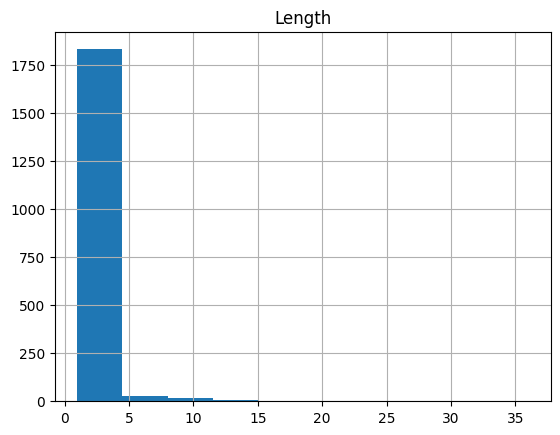

In [79]:
wc = pd.DataFrame()
wc['Length'] = smrwl
wc.hist()

# Cleaning

In [120]:
l = 'چجحخهعغفقثصضگکمنتالبیسشوپدذرزطظژء'

In [123]:
k = data['body'][0]

In [126]:
kk = ''
for i,j in enumerate(k):
    if (j in l)|(j == ' '):
      kk = kk + j
    else:pass

In [ ]:
kk.split()

In [119]:
def removepunc(x):

    x = re.sub(r"([^\u0600-\u06FF \t])|(\w+:\/\/\S+)", "", x)

    return x

In [118]:
removepunc(data['body'][0])

'این نوشتار بر آن است تا با بررسی فقه الحدیثی کتاب معانی الاخبار، اثر شیخ صدوق     ره     به روش و مبانی ایشان دست یابد     در پژوهش به عمل آمده، با کنکاش در روایات، نتیجه ذیل، حاصل گردید که شیخ صدوق     ره     چه در حیطه مبانی و چه در حیطه روش، با دو سبک بیانی و تبیینی به بیان مطالب فقه الحدیثی خویش پرداخته است     مواقعی که صدوق     ره     مبانی و روش های فقه الحدیثی خویش را با نقل روایت بیان نموده و آن را بدون هیچ توضیح و اضافاتی مسکوت می گذارد، حکایت از مبانی یا روش بیانی ایشان دارد و در پاره ای مواقع که بیانات و اضافات خویش را به دنبال روایت قید می نماید مبانی یا روش تبیینی وی در نظر گرفته شده است     از جمله مبانی فقه الحدیثی شیخ صدوق، اعتقاد به عصمت و علم انبیاء و ائمه اطهار     علیهم السلام    ، تقدم نص بر عقل با حفظ جایگاه عقل در پذیرش یا رد روایات، اعتقاد به لزوم تقیه می باشد     تشکیل خانواده حدیثی و چینش هندسی روایات، تفسیر روایات با قرآن و روایات نیز به عنوان نمونه از موارد روش های فقه الحدیثی ایشان است     نویسنده با ذکر شواهدی در این راستا، مؤیداتی بر نتایج علمی خویش ارا

In [114]:
data[0:5]['body'].apply(removepunc)

0    این نوشتار بر آن است تا با بررسی فقه الحدیثی ک...
1    چکیده           این پژوهش براساس چارچوب نظری د...
2    فهم معانی عمیق و تدبر در آیات قرآن کریم برای ب...
3    آزادی موهبتی است الهی که خدای متعال به انسان ع...
4    یکی از نکاتی که توجه پژوهشگران اندیشههای سیاسی...
Name: body, dtype: object

In [99]:
# cleaning comments
data['cleaned_comment'] = data['body'].apply(cleaning)


# calculate the length of comments based on their words
# data['cleaned_comment_len_by_words'] = data['cleaned_comment'].apply(lambda t: len(hazm.word_tokenize(t)))

# remove comments with the length of fewer than three words
# data['cleaned_comment_len_by_words'] = data['cleaned_comment_len_by_words'].apply(lambda len_t: len_t if minlim < len_t <= maxlim else len_t)
# data = data.dropna(subset=['cleaned_comment_len_by_words'])
# data = data.reset_index(drop=True)

data.head()

KeyboardInterrupt: ignored

# 2

# 3

# some good links

https://www.kaggle.com/code/halflingwizard/persian-text-augmentation
https://www.kaggle.com/code/soheiltehranipour/huggingface-nlp-in-a-nutshell
https://www.kaggle.com/code/m3hrdadfi/taaghche-sentiment-analysis
https://www.kaggle.com/code/mostafaoc2/persian-language-model

# transformer

In [ ]:
from transformers import MT5ForConditionalGeneration, MT5Tokenizer
model_size="small"
model_name = f"persiannlp/mt5-{model_size}-parsinlu-snli-entailment"
tokenizer = MT5Tokenizer.from_pretrained(model_name)
model = MT5ForConditionalGeneration.from_pretrained(model_name)


In [ ]:
l = tokenizer.get_vocab()

In [ ]:
l2 = {i:j for j,i in l.items()}

In [ ]:
k = 'خوشحال'
l3 = tokenizer(k)['input_ids']
l3

[16928, 23453, 1]

In [ ]:
for i in l3:
    print(l2[i])

▁خوش
حال
</s>


In [ ]:
b = ''
for i in l3:
    b = b + l2[i]

In [ ]:
b

'▁سلامتی</s>'

In [ ]:
l = list(model.named_parameters())

In [ ]:
ss = l[0][1].detach().numpy()

In [ ]:
ss[66532]

In [ ]:
ss[168310], ss[66532]

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# import required libraries
import numpy as np
from numpy.linalg import norm

# define two lists or array
A ,B = ss[168310], ss[66532]

cosine = np.dot(A,B)/(norm(A)*norm(B))
print("Cosine Similarity:", cosine)


Cosine Similarity: 0.13628982


In [ ]:
for i in model.named_parameters():
    print(i)

In [ ]:
dir(model)